 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
whale_path = Path("Resources/whale_returns.csv")
algo_path = Path("Resources/algo_returns.csv")
sp_path = Path("Resources/sp_tsx_history.csv")

In [4]:
whale_df = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_df = pd.read_csv(sp_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_df.sort_index(inplace=True)

In [5]:
# Reading whale returns
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
whale_df = whale_df.dropna().copy()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
sp_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [12]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp_df["Close"]= sp_df["Close"].str.replace("$","")
sp_df["Close"]= sp_df["Close"].str.replace(",","")
sp_df["Close"]= sp_df["Close"].astype("float")
sp_df.dtypes

Close    float64
dtype: object

In [14]:
# Calculate Daily Returns
daily_returns = sp_df.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [15]:
# Drop nulls
daily_returns.dropna(inplace=True)
daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [16]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns={"Close": "SP_tsx"})
daily_returns.head()

,SP_tsx
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data_cols = pd.concat(
    [whale_df, algo_df, daily_returns], axis="columns", join="inner")
joined_data_cols.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx
Date,,,,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,-0.004703


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date', ylabel='Daily Returns'>

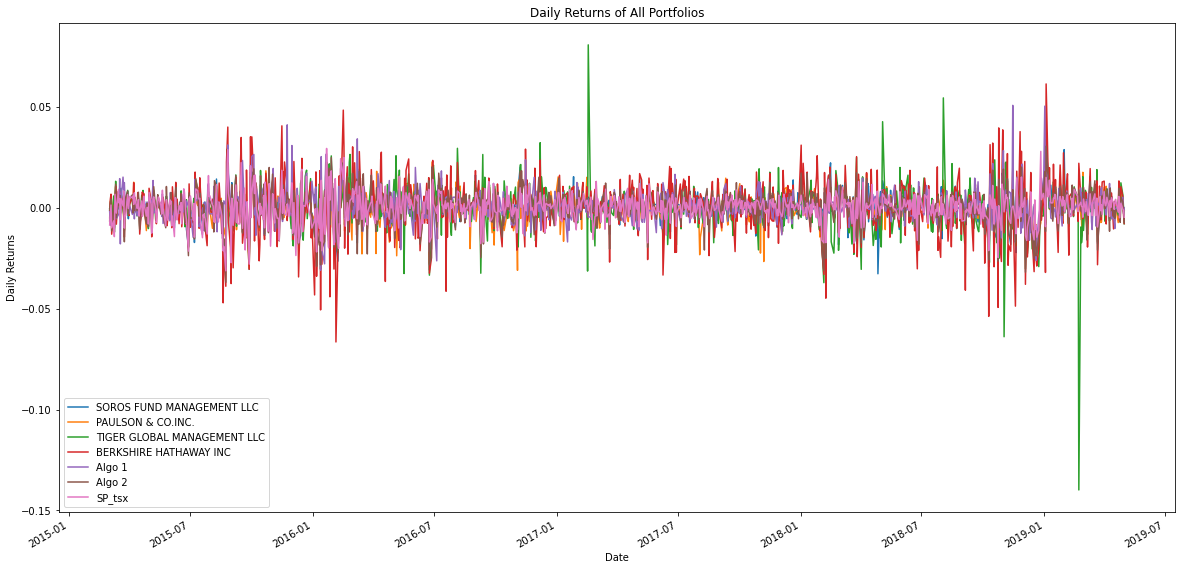

In [18]:
# Plot daily returns of all portfolios
joined_data_cols.plot(figsize=(20,10), title = 'Daily Returns of All Portfolios', ylabel = 'Daily Returns', legend = True)

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Analysis of Cumulative Returns'}, xlabel='Date', ylabel='Cumulative Return'>

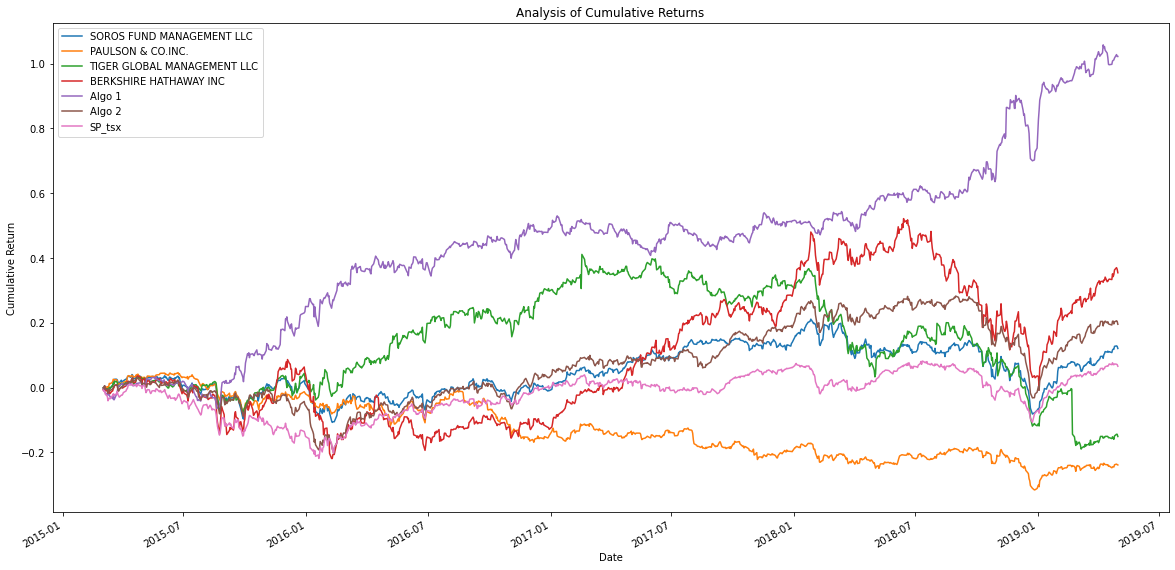

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+joined_data_cols).cumprod() -1
#cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title = 'Analysis of Cumulative Returns', xlabel = 'Date', ylabel = 'Cumulative Return', legend = True)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Potfolio Risk Analysis'}, ylabel='Range'>

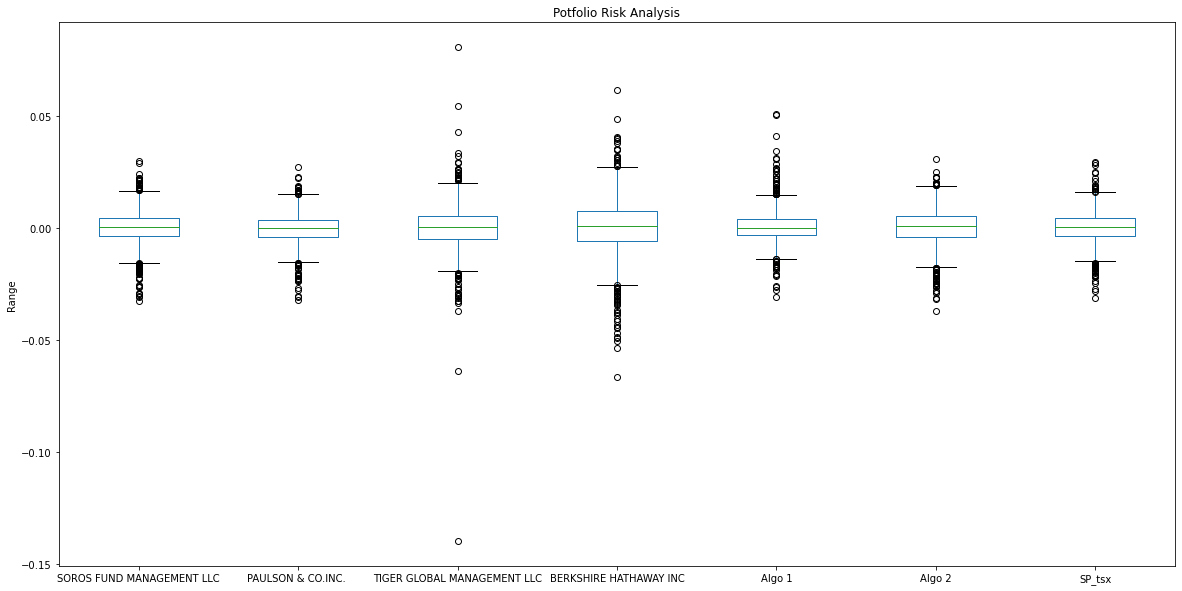

In [20]:
# Box plot to visually show risk
joined_data_cols.plot.box(figsize=(20,10), title = 'Potfolio Risk Analysis', xlabel= 'Company Name', ylabel = 'Range', legend = True)

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_data_cols.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP_tsx                         0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [22]:
# Calculate  the daily standard deviation of S&P TSX 60
sp60_daily_std = joined_data_cols['SP_tsx'].std()

# Determine which portfolios are riskier than the S&P TSX 60
daily_std > sp60_daily_std

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
SP_tsx                         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP_tsx                         0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'All Portfolio Rolling Standard Deviation'}, xlabel='Date', ylabel='Range'>

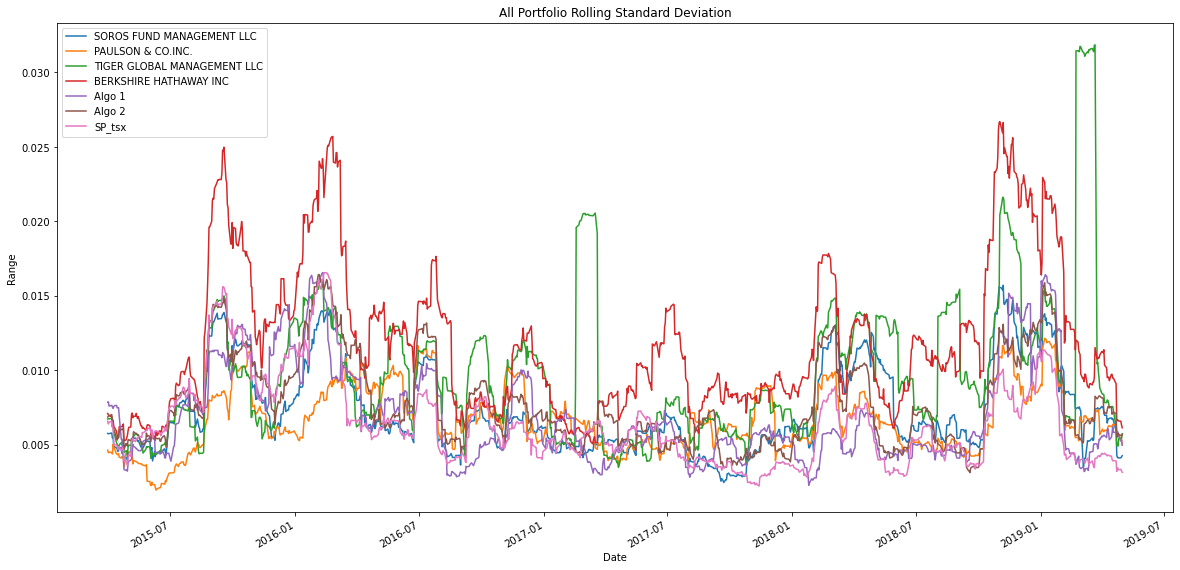

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_roll_std = joined_data_cols.rolling(window=21).std()
# Plot the rolling standard deviation
all_portfolios_roll_std.plot(figsize=(20,10), title = 'All Portfolio Rolling Standard Deviation', xlabel = 'Date', ylabel = 'Range', legend = True)

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
correlation_df = joined_data_cols.corr()
# Display de correlation matrix
correlation_df.style.background_gradient(cmap = 'gist_rainbow')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP_tsx,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'SOROS FUND MANAGEMENT ROLLING BETA'}, xlabel='Date', ylabel='Rolling Beta'>

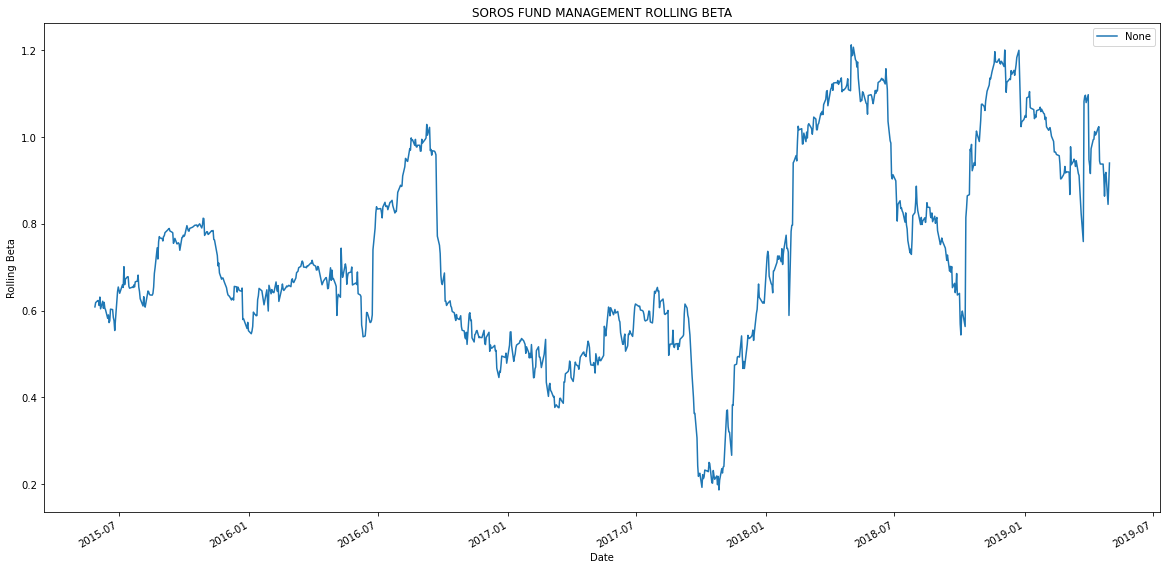

In [26]:
# Calculate covariance of a single portfolio
covariance = joined_data_cols["SOROS FUND MANAGEMENT LLC"].rolling(60).cov(joined_data_cols['SP_tsx'])

# Calculate variance of S&P TSX
variance = joined_data_cols['SP_tsx'].rolling(60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(20,10), title = 'SOROS FUND MANAGEMENT ROLLING BETA', xlabel = 'Date', ylabel = 'Rolling Beta', legend = True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date', ylabel='Range'>

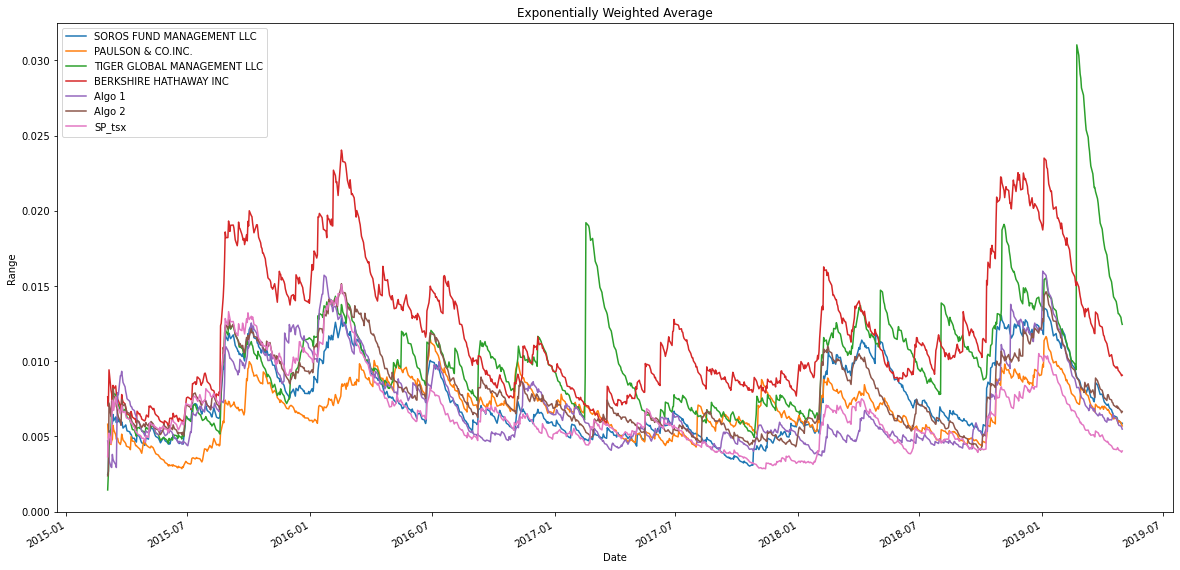

In [27]:
# Use `ewm` to calculate the rolling window
joined_data_cols.ewm(21).std().plot(figsize=(20,10), title = 'Exponentially Weighted Average', xlabel = 'Date', ylabel= 'Range', legend = True)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratio = (joined_data_cols.mean() * 252 / (joined_data_cols.std() * np.sqrt(252)))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP_tsx                         0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

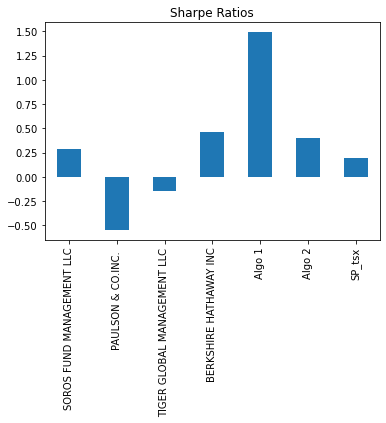

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title= 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [30]:
print(f"From the above, it can be concluded that Algo 1 outperformed both S&P TSX 60 and whales portfolios. However, Alog 2 outperformed S&P TSX 60 as well as two of the whales portfolios i.e Paulson & co and Tiger Global Mgt ")

From the above, it can be concluded that Algo 1 outperformed both S&P TSX 60 and whales portfolios. However, Alog 2 outperformed S&P TSX 60 as well as two of the whales portfolios i.e Paulson & co and Tiger Global Mgt 


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [31]:
# Reading data from 1st stock
from datetime import datetime

custom_date_parser = lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M").date()
aapl_path = Path("Resources/aapl_return.csv")
aapl_df = pd.read_csv(aapl_path, index_col="Date", parse_dates=True, infer_datetime_format=True, date_parser=custom_date_parser)
aapl_df.head()

,Close
Date,
2017-01-03,29.04
2017-01-04,29.01
2017-01-05,29.15
2017-01-06,29.48
2017-01-09,29.75


In [32]:
# Reading data from 2nd stock
from datetime import datetime

custom_date_parser = lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M").date()
acdvf_path = Path("Resources/acdvf_return.csv")
acdvf_df = pd.read_csv(acdvf_path, index_col="Date", parse_dates=True, infer_datetime_format=True, date_parser=custom_date_parser)
acdvf_df.head()

,Close
Date,
2017-01-03,10.27
2017-01-04,10.32
2017-01-05,10.41
2017-01-06,10.29
2017-01-09,10.19


In [33]:
# Reading data from 3rd stock
from datetime import datetime

custom_date_parser = lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M").date()
amzn_path = Path("Resources/amzn_returns.csv")
amzn_df = pd.read_csv(amzn_path, index_col="Date", parse_dates=True, infer_datetime_format=True, date_parser=custom_date_parser)
amzn_df.head()

,Close
Date,
2017-01-03,753.67
2017-01-04,757.18
2017-01-05,780.45
2017-01-06,795.99
2017-01-09,796.92


In [34]:
# Combine all stocks in a single DataFrame
combined_stocks= pd.concat(
    [aapl_df, acdvf_df, amzn_df], axis="columns", join="inner")
combined_stocks.head()

,Close,Close,Close
Date,,,
2017-01-03,29.04,10.27,753.67
2017-01-04,29.01,10.32,757.18
2017-01-05,29.15,10.41,780.45
2017-01-06,29.48,10.29,795.99
2017-01-09,29.75,10.19,796.92


In [35]:
# Reset Date index
#combined_stocks = combined_stocks.set_index("Date")
combined_stocks.head()

,Close,Close,Close
Date,,,
2017-01-03,29.04,10.27,753.67
2017-01-04,29.01,10.32,757.18
2017-01-05,29.15,10.41,780.45
2017-01-06,29.48,10.29,795.99
2017-01-09,29.75,10.19,796.92


In [36]:
# Reorganize portfolio data by having a column per symbol
columns = ["AAPL", "ACDVF", "AMZN"]
combined_stocks.columns=columns
combined_stocks.sort_index().head()

,AAPL,ACDVF,AMZN
Date,,,
2017-01-03,29.04,10.27,753.67
2017-01-04,29.01,10.32,757.18
2017-01-05,29.15,10.41,780.45
2017-01-06,29.48,10.29,795.99
2017-01-09,29.75,10.19,796.92


<AxesSubplot:title={'center':'AAPL, ACDVF, AMZN Daily Returns'}, xlabel='Date', ylabel='Daily Returns'>

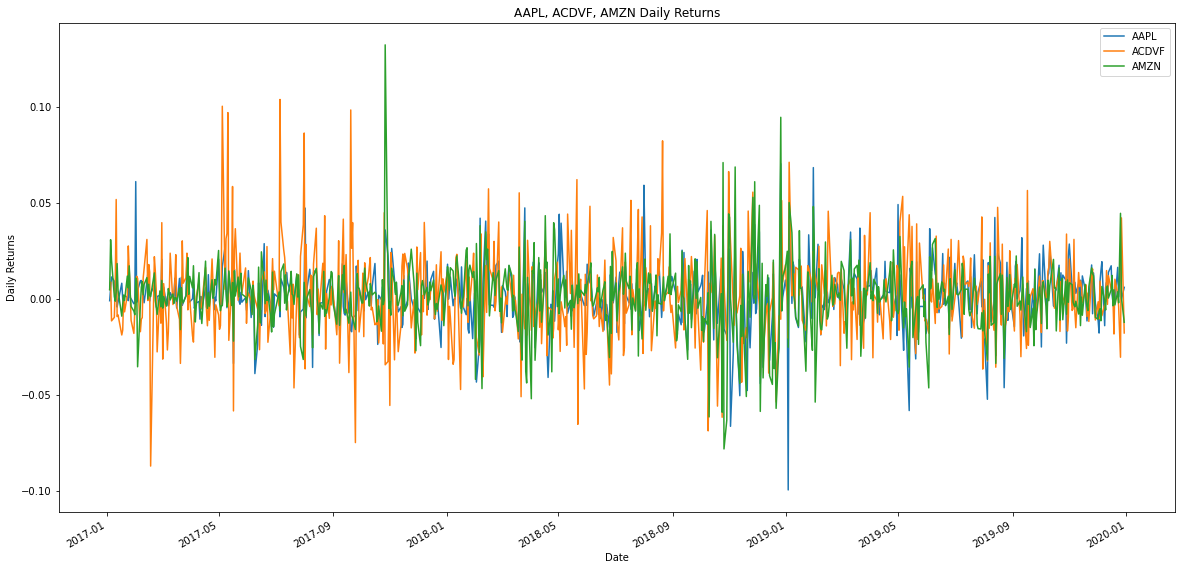

In [37]:
# Calculate daily returns
combined_stocks_daily_return = combined_stocks.pct_change()
#combined_stocks.head()

# Drop NAs
combined_stocks_daily_return = combined_stocks_daily_return.dropna()

# Display sample data
combined_stocks_daily_return.plot(figsize=(20,10), title = 'AAPL, ACDVF, AMZN Daily Returns', ylabel = 'Daily Returns', legend = True)

Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:title={'center':'Portfolio Return'}, xlabel='Date', ylabel='Range'>

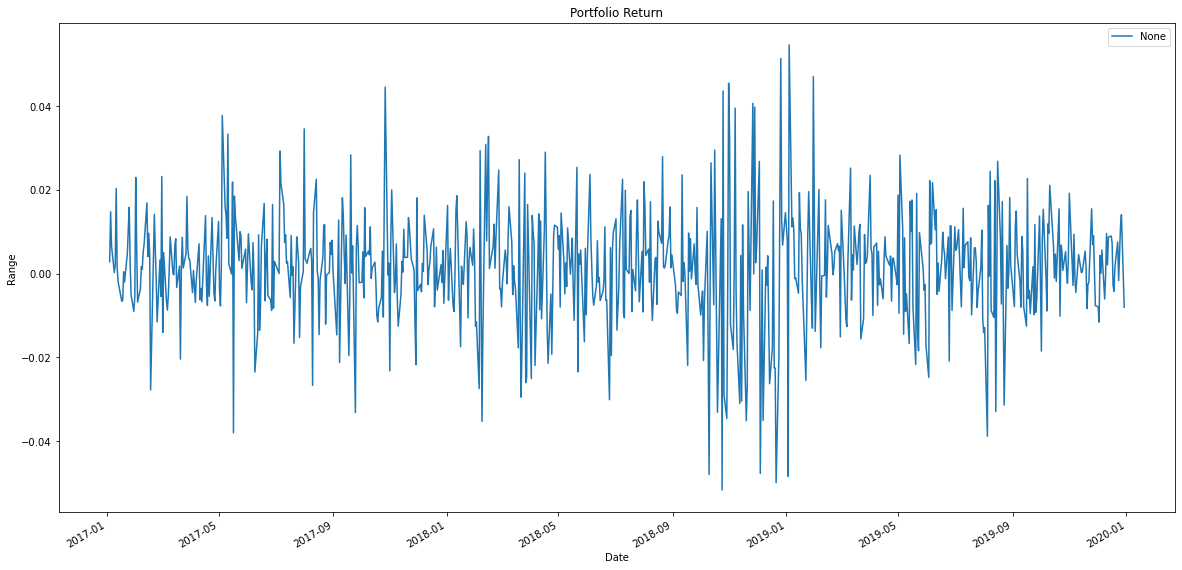

In [41]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_stocks_daily_return.dot(weights)
portfolio_returns

# Display sample data
portfolio_returns.plot(figsize=(20,10),  title = 'Portfolio Return', ylabel = 'Range', legend = True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Join your returns DataFrame to the original returns DataFrame
#all_portfolios= pd.DataFrame(portfolio_returns)
#all_portfolios.head()

all_portfolios = pd.concat([joined_data_cols, portfolio_returns], axis="columns", join= "inner")
all_portfolios.columns = [ 'SOROS FUND MANAGEMENT LLC',          'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC',      'BERKSHIRE HATHAWAY INC',
                            'Algo 1',                      'Algo 2',
                            'SP_tsx',                             'My_portfolio']

all_portfolios.tail()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx,My_portfolio
Date,,,,,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003341
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003698
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,-0.000779
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183,-0.002651
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,-0.004703,0.018741


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios.dropna().copy()
all_portfolios.tail()

In [ ]:
all_portfolios.columns

In [ ]:
all_portfolios.columns = [ 'SOROS FUND MANAGEMENT LLC',          'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC',      'BERKSHIRE HATHAWAY INC',
                            'Algo 1',                      'Algo 2',
                            'SP_tsx',                             'My_portfolio']

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized `std`
daily_std = all_portfolios.std()

annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.121693
PAULSON & CO.INC.              0.106413
TIGER GLOBAL MANAGEMENT LLC    0.187304
BERKSHIRE HATHAWAY INC         0.194384
Algo 1                         0.105821
Algo 2                         0.118850
SP_tsx                         0.089025
My_portfolio                   0.222307
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Total Portfolio Rolling Standard Deviation'}, xlabel='Date', ylabel='Range'>

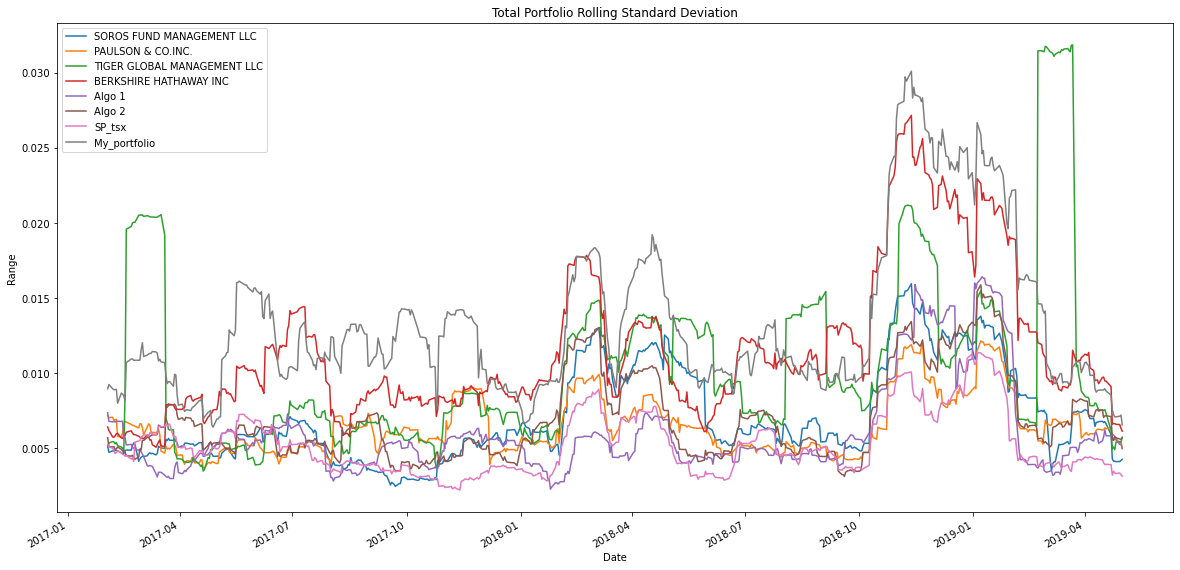

In [44]:
# Calculate rolling standard deviation
total_roll_std = all_portfolios.rolling(window=21).std()
# Plot rolling standard deviation
total_roll_std.plot(figsize=(20,10), title = 'Total Portfolio Rolling Standard Deviation', xlabel = 'Date', ylabel = 'Range', legend = True)

### Calculate and plot the correlation

<AxesSubplot:>

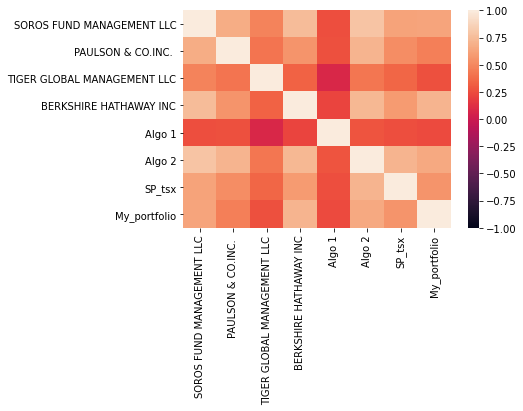

In [45]:
# Calculate and plot the correlation
correlation = all_portfolios.corr()

import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'My_portfolio'}, xlabel='Date', ylabel='Rolling Beta'>

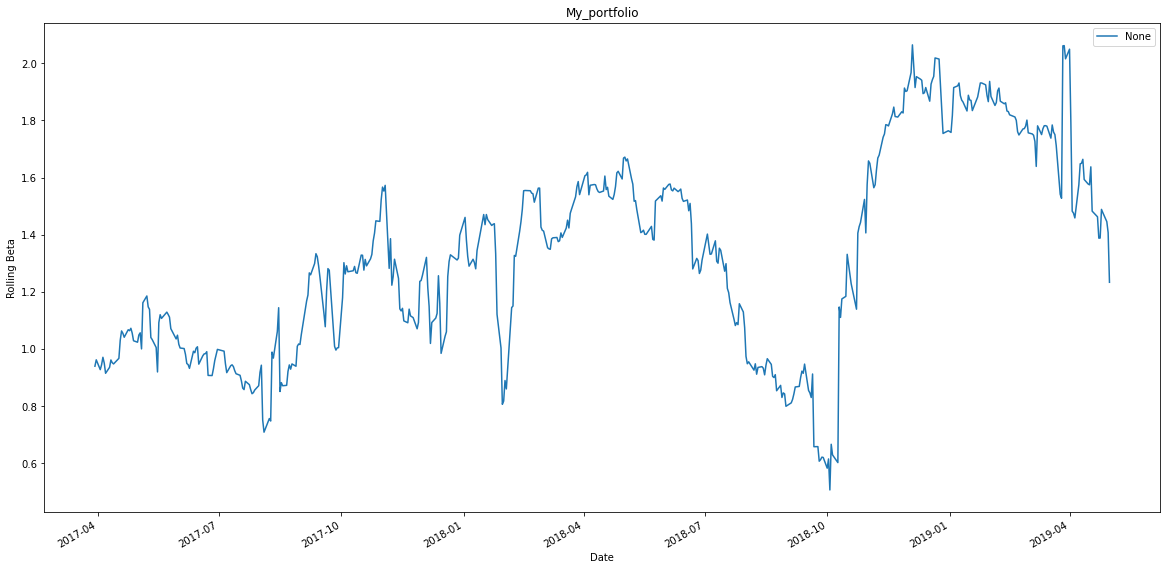

In [46]:
# Calculate and plot Beta

covariance = all_portfolios["My_portfolio"].rolling(60).cov(all_portfolios['SP_tsx'])

variance = all_portfolios['SP_tsx'].rolling(60).var()

beta = covariance / variance

beta.plot(figsize=(20,10), title = 'My_portfolio' , xlabel = 'Date', ylabel = 'Rolling Beta', legend = True)


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio = (all_portfolios.mean() * 252 / (all_portfolios.std() * np.sqrt(252)))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.543835
PAULSON & CO.INC.             -0.432069
TIGER GLOBAL MANAGEMENT LLC   -0.864525
BERKSHIRE HATHAWAY INC         1.139361
Algo 1                         1.278984
Algo 2                         0.677930
SP_tsx                         0.423040
My_portfolio                   1.553155
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

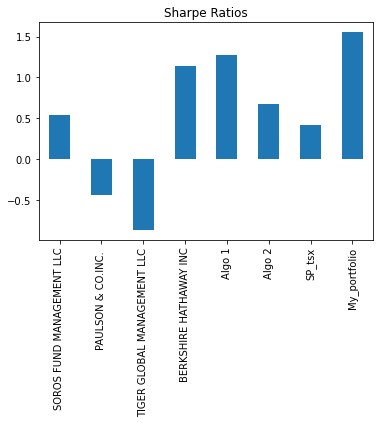

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title= 'Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [82]:
print(f"From the above, it can be concluded that my portfolio outperformed Whales, Algo 1& 2 as well as S&P TSX 60. Since Sharpe ratio is the excess return received for the extra volatility endured for holding risker asset, investors in my portfolio are compensated for the risk compared to holders of other investments during the period.")

From the above, it can be concluded that my portfolio outperformed Whales, Algo 1& 2 as well as S&P TSX 60. Since Sharpe ratio is the excess return received for the extra volatility endured for holding risker asset, investors in my portfolio are compensated for the risk compared to holders of other investments during the period.
